In [1]:
#Loading packages and libraries required for data analysis
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading our dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [3]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [4]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
Applicant_ID    24000 non-null object
form_field1     22890 non-null float64
form_field2     22291 non-null float64
form_field3     23854 non-null float64
form_field4     23854 non-null float64
form_field5     23854 non-null float64
form_field6     18396 non-null float64
form_field7     21769 non-null float64
form_field8     18396 non-null float64
form_field9     20600 non-null float64
form_field10    23853 non-null float64
form_field11    10602 non-null float64
form_field12    19817 non-null float64
form_field13    21537 non-null float64
form_field14    24000 non-null int64
form_field15    14408 non-null float64
form_field16    18526 non-null float64
form_field17    19305 non-null float64
form_field18    19631 non-null float64
form_field19    24000 non-null float64
form_field20    23853 non-null float64
form_field21    17293 non-null float64
form_field22    15276 non-null float

In [7]:
#printing summary statistics
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [8]:
#printing summary statistics
train.describe(include='O')

,Applicant_ID,form_field47,default_status
count,56000,56000,56000
unique,56000,2,2
top,Apcnt_1001824,charge,no
freq,1,36373,42285


no     42285
yes    13715
Name: default_status, dtype: int64

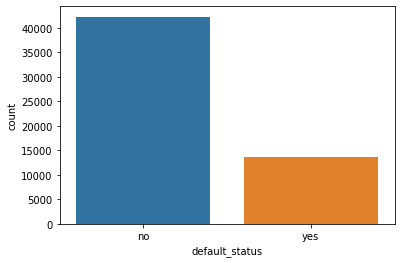

In [9]:
#countplot of form_field47 feature..
sns.countplot('default_status',data=train)
train['default_status'].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

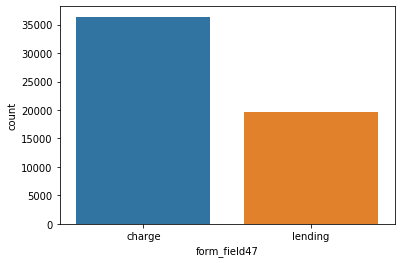

In [10]:
#countplot of form_field47 feature..
sns.countplot('form_field47',data=train)
train['form_field47'].value_counts()

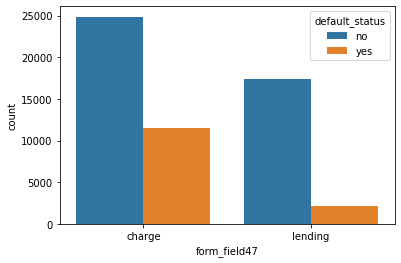

In [11]:
#frequency distribution of form_field47 variable with respect to the target variable 'default_status'
sns.countplot(x='form_field47',hue='default_status',data=train)

# Exploratory Data Analysis

In [12]:
# Combining datasets
combined_data = [train, test]

In [13]:
# Creating new column form_field32_33
for dataset in combined_data:
    dataset['form_field_32_33'] = dataset['form_field32'] + dataset['form_field33']
   
    # Drop form_field32 and form_field33
    dataset.drop(['form_field32', 'form_field33'],axis=1,inplace=True)

In [14]:
# Filling missing values
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

In [15]:
# Encoding non numerical variables

from sklearn.preprocessing import LabelEncoder

train["form_field47"] = LabelEncoder().fit_transform(train["form_field47"])

train["default_status"] = LabelEncoder().fit_transform(train["default_status"])

test["form_field47"] = LabelEncoder().fit_transform(test["form_field47"])

In [16]:
train2 = train.drop(["Applicant_ID"], axis = 1)
test2 = test.drop(["Applicant_ID"], axis = 1)

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

mm_sc = MinMaxScaler()
train2 = pd.DataFrame(mm_sc.fit_transform(train2), columns=train2.columns)
train2

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,form_field_32_33
0,0.905287,0.982567,0.947258,0.915949,0.710148,0.000019,0.004952,0.002439,0.013353,0.005172,0.025759,0.018560,3.204741e-03,0.000250,0.032459,0.990099,0.980392,0.980392,0.975657,0.974708,0.383396,0.000000,0.000000,0.034497,0.191607,0.243194,0.284345,0.017144,0.241120,0.262194,0.000000,0.981373,0.000000,0.843203,0.914932,0.868398,0.979412,0.000000,0.000000,0.998195,0.917601,0.999912,0.995020,0.99502,0.0,0.000000,0.973836,0.000004,0.0,0.092246
1,0.909369,0.982949,0.945912,0.915949,0.710148,0.000019,0.000417,0.004806,0.028354,0.001156,0.001437,0.032117,8.716828e-04,0.000073,0.013070,0.990099,0.980392,0.980392,0.974684,0.973735,0.374798,0.126114,0.158691,0.033037,0.197758,0.194038,0.228418,0.021094,0.192383,0.255339,0.000000,0.979412,0.990089,0.846539,0.925792,0.871861,0.979412,0.000000,0.000000,0.998117,0.923156,0.999383,0.000000,0.99502,0.0,0.000025,0.974314,0.000004,0.0,0.159963
2,0.872627,0.982816,0.948673,0.915949,0.714614,0.000000,0.000444,0.000000,0.000606,0.000493,0.000000,0.000000,4.064569e-07,0.000043,0.006497,0.000000,0.000000,0.000000,0.972736,0.971790,0.000000,0.000000,0.000000,0.000000,0.099511,0.077349,0.095655,0.017144,0.222859,0.000000,0.322498,0.979412,0.000000,0.843203,0.904072,0.870130,0.979412,0.698520,0.000000,0.997965,0.932414,0.999991,0.995020,0.99502,0.0,0.000000,0.974210,0.000004,1.0,0.047922
3,0.892223,0.982454,0.946168,0.915949,0.710148,0.003635,0.001411,0.003726,0.012459,0.001653,0.000000,0.006230,4.832882e-04,0.000125,0.039437,0.989109,0.979412,0.979412,0.973710,0.972763,0.378481,0.097547,0.010173,0.033010,0.103478,0.067493,0.084442,0.017144,0.169236,0.000000,0.000000,0.980392,0.991080,0.836530,0.911312,0.868398,0.980392,0.000000,0.000000,0.998291,0.917601,0.999885,0.000000,0.99502,0.0,0.000020,0.973383,0.000004,0.0,0.068494
4,0.891815,0.983046,0.946732,0.915949,0.710148,0.000048,0.000100,0.002079,0.004015,0.000166,0.002327,0.006606,2.085315e-04,0.000073,0.004425,0.989109,0.979412,0.979412,0.975657,0.974708,0.373210,0.095308,0.115332,0.033909,0.097729,0.057678,0.073275,0.017144,0.272796,0.525707,0.128962,0.979412,0.990089,0.853211,0.905882,0.885714,0.979412,0.698722,0.000000,0.998077,0.926859,0.999638,0.995020,0.99502,0.0,0.000021,0.974126,0.000004,0.0,0.056987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.967340,0.982303,0.945690,0.915949,0.710148,0.014529,0.004465,0.039029,0.036378,0.009087,0.000000,0.007933,1.057300e-02,0.000125,0.025062,0.989109,0.979412,0.979412,0.972736,0.971790,0.348591,0.027100,0.010173,0.030880,0.146191,0.111721,0.134763,1.000000,0.226503,0.076575,0.000000,0.979412,0.990089,0.836530,0.911312,0.871861,0.979412,0.000000,0.000000,0.997803,0.924082,0.999930,0.000000,0.99502,1.0,0.000030,0.972736,0.000004,0.0,0.084435
55996,0.889773,0.984264,0.946282,0.915949,0.710148,0.000000,0.000430,0.000000,0.000000,0.000844,0.003350,0.000000,4.064569e-07,0.000043,0.000000,0.000000,0.000000,0.979412,0.972736,0.972763,0.000000,0.146122,0.000000,0.000000,0.108824,0.087164,0.106822,0.017144,0.168035,0.099476,0.261792,0.979412,0.000000,0.856547,0.904072,0.894372,0.979412,0.703594,0.905513,0.998100,0.943524,0.999698,0.000000,0.99502,1.0,0.000000,0.972736,0.000000,1.0,0.056255
55997,0.918351,0.983040,0

In [18]:
mm_sc = MinMaxScaler()
test2 = pd.DataFrame(mm_sc.fit_transform(test2), columns=test2.columns)
test2

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,form_field_32_33
0,0.864462,0.978492,0.976449,0.828734,0.770307,0.008707,0.000544,0.003696,0.000375,0.000001,0.009140,0.000040,7.200475e-07,0.000125,0.029429,0.991071,0.990089,0.990089,0.000000,0.976540,0.000000,0.000000,0.000000,0.000000,0.098722,0.107259,0.081480,0.017144,0.220461,0.506310,0.000000,0.985207,0.000000,0.857263,0.894549,0.851976,0.985207,0.0,0.000000,0.998627,0.916675,1.000000,0.000000,0.981336,0.0,0.000000,0.976540,0.000004,0.097812
1,0.874260,0.979398,0.969444,0.836217,0.770307,0.000021,0.012789,0.000441,0.001047,0.023652,0.003454,0.006381,1.007280e-03,0.000090,0.022448,0.992063,0.991080,0.991080,0.083333,0.978495,0.634835,0.000000,0.000000,0.036672,0.193253,0.167076,0.173226,0.017144,0.182017,0.212366,0.000000,0.988166,0.000000,0.863980,0.908847,0.851976,0.987179,0.0,0.840709,0.998310,0.919453,0.999823,0.996016,0.981336,1.0,0.000000,0.977033,0.000004,0.176424
2,0.000000,0.978420,0.966638,0.828734,0.770307,0.000000,0.000000,0.000000,0.000000,0.000001,0.000660,0.000000,0.000000e+00,0.000057,0.000000,0.000000,0.000000,0.000000,0.000000,0.976540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029966,0.081988,0.000000,0.000000,0.985207,0.000000,0.840470,0.000000,0.840202,0.000000,0.0,0.000000,0.000000,0.915749,0.000000,0.000000,0.000000,0.0,0.000000,0.976540,0.000000,0.000000
3,0.863646,0.978430,0.969292,0.828734,0.770307,0.000021,0.000616,0.004183,0.001195,0.000639,0.007708,0.007318,8.802686e-04,0.000043,0.000000,0.993056,0.992071,0.992071,0.125000,0.979472,0.616175,0.173618,0.000000,0.025888,0.114276,0.077373,0.084185,0.017144,0.224297,0.000000,0.000000,0.986193,0.993049,0.869018,0.892761,0.862069,0.985207,0.0,0.000000,0.998718,0.917601,0.999664,0.000000,0.000000,0.0,0.000009,0.977311,0.000004,0.099167
4,0.911410,0.980202,0.967384,0.830823,0.770307,0.000432,0.001494,0.010145,0.005445,0.007433,0.001507,0.003816,3.445735e-03,0.000125,0.018488,0.991071,0.990089,0.990089,0.125000,0.979472,0.632891,0.018145,0.007818,0.023696,0.176278,0.161626,0.167816,0.019119,0.178139,0.323638,0.000000,0.986193,0.992056,0.858942,0.917784,0.857023,0.985207,0.0,0.000000,0.998036,0.937043,0.999927,0.995020,0.981336,1.0,0.000019,0.978141,0.000004,0.268735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.868953,0.978522,0.967131,0.832988,0.770307,0.000000,0.002959,0.000000,0.000000,0.002947,0.009662,0.000000,7.200475e-07,0.000057,0.032365,0.000000,0.000000,0.000000,0.000000,0.976540,0.000000,0.000000,0.000000,0.000000,0.073224,0.000000,0.000000,0.021094,0.066602,0.143876,0.000000,0.985207,0.992056,0.843829,0.892761,0.845248,0.985207,0.0,0.901707,0.998901,0.915749,1.000000,0.000000,0.982318,0.0,0.000000,0.976540,0.000000,0.080797
23996,0.921208,0.979083,0.966580,0.828734,0.770307,0.031035,0.006193,0.042060,0.062136,0.016795,0.000000,0.304434,7.041759e-02,0.000250,0.000000,0.991071,0.990089,0.990089,0.125000,0.979472,0.624066,0.156478,0.000000,0.026219,0.117614,0.109984,0.116555,1.000000,0.220461,0.201013,0.000000,0.985207,0.992056,0.847187,0.894549,0.846930,0.985207,0.0,0.928412,0.997803,0.926859,0.999396,0.995020,0.981336,0.0,0.000043,0.979472,0.000004,0.126262
23997,0.877934,0.978207,0.970681,0.828734,0.789921,0.000000,0.000065,0.000000,0.000000,0.000065,0.00

## Model Training

In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [20]:
X = train2.drop(["default_status"], axis=1)
y = train2["default_status"]

X_test = test2

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

In [21]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (44800, 49)
y_train shape: (44800,)
X_val shape: (11200, 49)
y_val shape: (11200,)


## Building Models

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
#from rgf import RGFClassifier

In [24]:
lgb1 = lgbm.LGBMClassifier(random_state=34, n_estimators=5000, colsample_bytree=0.9, min_child_samples=10, subsample=0.7, 
                          subsample_freq=2, num_leaves=120, reg_lambda=2, reg_alpha=5, metric='auc', learning_rate=0.008, 
                          max_depth=5)

lgb2 = lgbm.LGBMClassifier(random_state=34, n_estimators=5000, colsample_bytree=0.9, min_child_samples=10, subsample=0.5, 
                           subsample_freq=2, num_leaves=120, reg_lambda=2, reg_alpha=5, metric='auc', learning_rate=0.008, 
                           max_depth=5)

cat1 = CatBoostClassifier(depth=5, learning_rate=0.035, random_seed=34, n_estimators=5000, silent=True)

cat2 =  CatBoostClassifier(random_seed=34, bootstrap_type='Bayesian', max_depth=6, learning_rate=0.007, iterations=8000, 
                           silent=True, eval_metric='AUC')

rf1 = RandomForestClassifier(n_jobs=-1, criterion='entropy', min_samples_split=10, n_estimators=400, random_state=99)

rf2 = RandomForestClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=15, n_estimators=400, n_jobs=-1, 
                             random_state=34)

xgb = XGBClassifier(learning_rate=0.01, subsample=0.7, colsample_bytree=0.9, reg_alpha=10, n_jobs=-1, n_estimators=5000, 
                    max_depth= 5, random_state=34)

gbc = GradientBoostingClassifier(max_depth=4, min_samples_leaf=10, n_estimators=200, learning_rate=0.1, 
                                 min_samples_split=10, random_state=10)

etc =  ExtraTreesClassifier(n_estimators=500, random_state=10)

#lgb1.fit(X_train,y_train)
#lgb2.fit(X_train,y_train)
#cat1.fit(X_train,y_train)
#cat2.fit(X_train,y_train)
#rf1.fit(X_train,y_train)
#rf2.fit(X_train,y_train)
#xgb.fit(X_train,y_train)
#gbc.fit(X_train,y_train)

In [25]:
classifiers = [('lgb1', lgb1), ('lgb2', lgb2), ('cat1', cat1), ('cat2', cat2), ('rf1', rf1), ('rf2', rf2), ('xgb', xgb), 
               ('gbc', gbc), ('etc',etc)]

In [26]:
# for seed value 64

preds, scores = [], []
 
seed = 64
 
vc = VotingClassifier(estimators=classifiers, voting="soft")
 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
 
i = 10
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", vc)])
    pipe.fit(X_train, y_train)
    score = roc_auc_score(y_val, pipe.predict_proba(X_val)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(X_test)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1

np.mean(scores)

Number of splits left 10 to train.
0.8486341704198486
Number of splits left 9 to train.
0.8469906524917843
Number of splits left 8 to train.
0.8426528923226894
Number of splits left 7 to train.
0.8449090239750935
Number of splits left 6 to train.
0.8434643965345487
Number of splits left 5 to train.
0.8477882161023002
Number of splits left 4 to train.
0.8416586619576896
Number of splits left 3 to train.
0.8341068918474108
Number of splits left 2 to train.
0.8428256415670736
Number of splits left 1 to train.
0.8278651165133696


0.8420895663731807

In [27]:
ss = pd.read_csv("sample_submission.csv")
y_pred = np.mean(preds, axis=0)
pd.DataFrame({"Customer_ID": test["Customer_ID"], "Claim": y_pred}).to_csv("submission1.csv", index = False)

In [ ]:
# for seed value 45

preds, scores = [], []
seed = 45
 
vc = VotingClassifier(estimators=classifiers, voting="soft")
 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
 
i = 10
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", vc)])
    pipe.fit(X_train, y_train)
    score = roc_auc_score(y_val, pipe.predict_proba(X_val)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(X_test)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1

np.mean(scores)

In [ ]:
ss = pd.read_csv("SampleSubmission.csv")
y_pred = np.mean(preds, axis=0)
ss["default_status"] = y_pred
ss.to_csv("submission45.csv", index=False)

In [ ]:
# for seed value 32

preds, scores = [], []
 
seed = 32
 
vc = VotingClassifier(estimators=classifiers, voting="soft")
 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
 
i = 10
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", vc)])
    pipe.fit(X_train, y_train)
    score = roc_auc_score(y_val, pipe.predict_proba(X_val)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(X_test)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1

np.mean(scores)

In [ ]:
ss = pd.read_csv("SampleSubmission.csv")
y_pred = np.mean(preds, axis=0)
ss["default_status"] = y_pred
ss.to_csv("submission32.csv", index=False)

In [ ]:
# for seed value 32

preds, scores = [], [] 
seed = 32
 
vc = VotingClassifier(estimators=classifiers, voting="soft")
 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
 
i = 10
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", vc)])
    pipe.fit(X_train, y_train)
    score = roc_auc_score(y_val, pipe.predict_proba(X_val)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(X_test)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1

pred_32 = np.mean(preds, axis=0)
np.mean(scores)

In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
ss['default_status'] = pred_32
ss.to_csv('submission_32.csv', index=False)

## Blending Predictions

In [ ]:
sub1 = pd.read_csv('submission64.csv')
sub2 = pd.read_csv('submission45.csv')
sub3 = pd.read_csv('submission32.csv')
sub4 = pd.read_csv('submission_32.csv')

In [ ]:
blend = (sub1['default_status'] + sub2['default_status'] + sub4['default_status'])/3
ss = pd.read_csv('SampleSubmission.csv')
ss['default_status'] = blend
ss.to_csv('final_sub.csv', index=False)

In [ ]:
blend1 = sub1['default_status']*0.6 + sub2['default_status']*0.4
ss = pd.read_csv('SampleSubmission.csv')
ss['default_status'] = blend1
ss.to_csv('final_sub1.csv', index=False)

In [ ]:
blend2 = sub1['default_status']*0.6 + sub2['default_status']*0.3 + sub4['default_status']*0.1
ss = pd.read_csv('SampleSubmission.csv')
ss['default_status'] = blend2
ss.to_csv('final_sub2.csv', index=False)